In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nfl_data_py as nfl
import statsmodels.formula.api as smf

In [3]:
seasons = range(2016, 2023)
pbp_py = nfl.import_pbp_data(seasons)

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [4]:
pbp_py_run = pbp_py.query("play_type == 'run' & rusher_id.notnull()").reset_index()
pbp_py_run.loc[pbp_py_run['rushing_yards'].isnull(), 'rushing_yards'] = 0
pbp_py_run.describe()

,index,play_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,...,xyac_fd,xpass,pass_oe,defenders_in_box,number_of_pass_rushers,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure
count,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.000000,92410.0,92395.000000,92410.000000,...,0.0,92176.000000,92175.000000,92277.000000,440.000000,92408.000000,92408.000000,0.0,0.0,0.0
mean,169660.579158,2010.583618,9.662342,50.087383,461.153290,906.566223,1797.586548,0.0,11.207414,0.036879,...,NaN,0.470644,-47.064259,6.871593,4.770454,11.002251,10.996375,NaN,NaN,NaN
std,97446.594648,1226.199463,5.382186,25.472832,263.403412,527.278198,1055.831787,0.0,6.763941,0.188466,...,NaN,0.186944,18.694447,0.987994,1.038897,0.161143,0.154079,NaN,NaN,NaN
min,2.000000,48.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,NaN,0.010774,-99.512955,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN
25%,84627.750000,916.000000,5.000000,30.000000,229.000000,441.000000,874.000000,0.0,5.000000,0.000000,...,NaN,0.364107,-57.091480,6.000000,4.000000,11.000000,11.000000,NaN,NaN,NaN
50%,170444.500000,2024.000000,10.000000,54.000000,458.000000,900.000000,1800.000000,0.0,11.000000,0.000000,...,NaN,0.467527,-46.752651,7.000000,4.500000,11.000000,11.000000,NaN,NaN,NaN
75%,254798.750000,3055.000000,14.000000,72.000000,690.000000,1366.000000,2705.000000,0.0,17.000000,0.000000,...,NaN,0.570916,-36.410507,7.000000,5.000000,11.000000,11.000000,NaN,NaN,NaN
max,336314.000000,5664.000000,22.000000,99.000000,900.000000,1800.000000,3600.000000,0.0,38.000000,1.000000,...,NaN,0.995130,-1.077398,11.000000,10.000000,12.000000,12.000000,NaN,NaN,NaN


In [5]:
sns.set_theme(style="whitegrid", palette="colorblind")

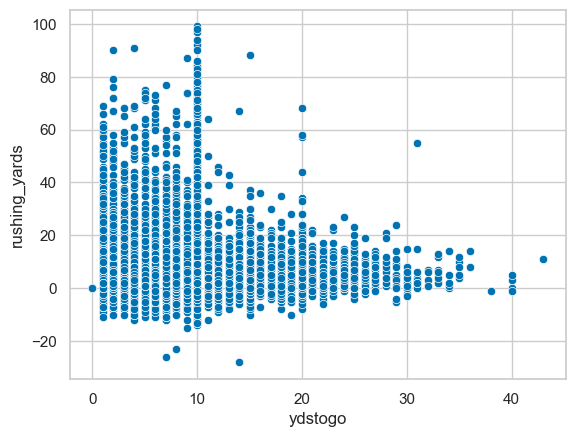

In [6]:
sns.scatterplot(data=pbp_py_run, x='ydstogo', y='rushing_yards')
plt.show()

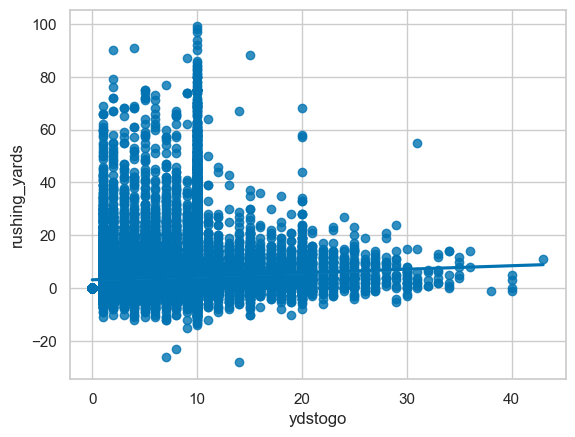

In [7]:
sns.regplot(data=pbp_py_run, x='ydstogo', y='rushing_yards')
plt.show()

In [8]:
pbp_py_run_ave = pbp_py_run.groupby('ydstogo').agg({'rushing_yards': ['mean']})
pbp_py_run_ave.columns = list(map('_'.join, pbp_py_run_ave.columns.values))
pbp_py_run_ave.reset_index(inplace=True)
pbp_py_run_ave.describe()

,ydstogo,rushing_yards_mean
count,40.000000,40.000000
mean,19.675000,5.071728
std,11.998691,2.306583
min,0.000000,-1.000000
25%,9.750000,4.189400
50%,19.500000,4.855017
75%,29.250000,5.783026
max,43.000000,11.000000


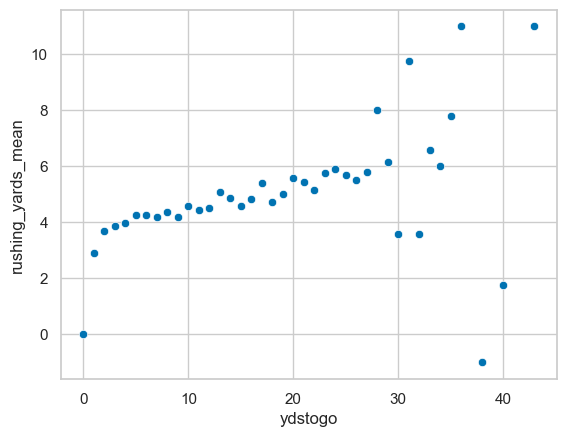

In [9]:
sns.scatterplot(data=pbp_py_run_ave, x='ydstogo', y='rushing_yards_mean')
plt.show()

In [10]:
yards_to_go_py = smf.ols(formula='rushing_yards ~ 1 + ydstogo', data=pbp_py_run)
yards_to_go_py_fit = yards_to_go_py.fit()
yards_to_go_py_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          rushing_yards   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     623.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          3.28e-137
Time:                        20:17:06   Log-Likelihood:            -3.0102e+05
No. Observations:               92410   AIC:                         6.021e+05
Df Residuals:                   92408   BIC:                         6.021e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2182      0.047     68.125      0.000       3.126       3.311
ydstogo        0.1329      0.005     24.975      0.000       0.122       0.143
==============================================================================
Omnibus:                    81979.469   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4086429.359
Skew:                           4.126   Prob(JB):                         0.00
Kurtosis:                      34.515   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
pbp_py_run['ryoe'] = yards_to_go_py_fit.resid
pbp_py_run['ryoe'].describe()

count    9.241000e+04
mean     1.338475e-13
std      6.287442e+00
min     -3.307865e+01
25%     -3.351128e+00
50%     -1.414217e+00
75%      1.452897e+00
max      9.445290e+01
Name: ryoe, dtype: float64

In [28]:
ryoe_py = pbp_py_run \
    .groupby(['season', 'rusher_id', 'rusher']) \
    .agg({
        'ryoe': ['count', 'sum', 'mean'],
        'rushing_yards': 'mean'
    })
ryoe_py.columns = list(map('_'.join, ryoe_py.columns.values))
ryoe_py.reset_index(inplace=True)

ryoe_py = ryoe_py.rename(columns={
    "ryoe_count": "n",
    "ryoe_sum": "ryoe_total",
    "ryoe_mean": "ryoe_per",
    "rushing_yards_mean": "yards_per_carry"
}).query("n > 50")
ryoe_py.head()

,season,rusher_id,rusher,n,ryoe_total,ryoe_per,yards_per_carry
12,2016,00-0023500,F.Gore,263,-105.508190,-0.401172,3.897338
13,2016,00-0023564,D.Sproles,94,29.309234,0.311800,4.659575
18,2016,00-0024242,D.Williams,114,-112.792550,-0.989408,3.324561
29,2016,00-0026153,J.Stewart,218,-116.107359,-0.532603,3.779817
32,2016,00-0026184,M.Forte,218,-132.688577,-0.608663,3.729358


In [29]:
ryoe_py.sort_values('ryoe_total', ascending=False).head(10)

,season,rusher_id,rusher,n,ryoe_total,ryoe_per,yards_per_carry
1988,2021,00-0036223,J.Taylor,332,417.637078,1.257943,5.454819
1439,2020,00-0032764,D.Henry,397,362.926338,0.914172,5.206549
1257,2019,00-0034796,L.Jackson,135,353.707586,2.620056,6.800000
1143,2019,00-0032764,D.Henry,387,324.075218,0.837404,5.131783
1473,2020,00-0033293,A.Jones,222,288.447884,1.299315,5.540541
1102,2019,00-0031687,R.Mostert,190,281.790033,1.483105,5.831579
318,2016,00-0033045,E.Elliott,344,278.703996,0.810186,5.104651
1899,2021,00-0034791,N.Chubb,228,275.946445,1.210291,5.521930
2234,2022,00-0034796,L.Jackson,73,275.870922,3.779054,7.821918
1558,2020,00-0034791,N.Chubb,221,253.859380,1.148685,5.475113


In [30]:
ryoe_py.sort_values('ryoe_per', ascending=False).head(10)

,season,rusher_id,rusher,n,ryoe_total,ryoe_per,yards_per_carry
2234,2022,00-0034796,L.Jackson,73,275.870922,3.779054,7.821918
1257,2019,00-0034796,L.Jackson,135,353.707586,2.620056,6.800000
1285,2019,00-0035228,K.Murray,55,121.267729,2.204868,6.527273
1559,2020,00-0034796,L.Jackson,121,249.526749,2.062205,6.264463
1896,2021,00-0034750,R.Penny,119,229.289373,1.926801,6.294117
2376,2022,00-0036945,J.Fields,85,159.641251,1.878132,6.000000
2164,2022,00-0033357,T.Hill,96,178.211040,1.856365,5.989583
1869,2021,00-0034253,D.Hilliard,56,100.677659,1.797815,6.250000
2228,2022,00-0034750,R.Penny,57,99.173522,1.739886,6.070176
1235,2019,00-0034400,J.Wilkins,51,87.854801,1.722643,6.019608


In [31]:
cols_keep = ['season', 'rusher_id', 'rusher', 'ryoe_per', 'yards_per_carry']
ryoe_now_py = ryoe_py[cols_keep].copy()
ryoe_last_py = ryoe_py[cols_keep].copy()
ryoe_last_py.rename(columns={
    'ryoe_per': 'ryoe_per_last',
    'yards_per_carry': 'yards_per_carry_last'
}, inplace=True)
ryoe_last_py['season'] += 1
ryoe_now_py.head(), ryoe_last_py.head()

(    season   rusher_id      rusher  ryoe_per  yards_per_carry
 12    2016  00-0023500      F.Gore -0.401172         3.897338
 13    2016  00-0023564   D.Sproles  0.311800         4.659575
 18    2016  00-0024242  D.Williams -0.989408         3.324561
 29    2016  00-0026153   J.Stewart -0.532603         3.779817
 32    2016  00-0026184     M.Forte -0.608663         3.729358,
     season   rusher_id      rusher  ryoe_per_last  yards_per_carry_last
 12    2017  00-0023500      F.Gore      -0.401172              3.897338
 13    2017  00-0023564   D.Sproles       0.311800              4.659575
 18    2017  00-0024242  D.Williams      -0.989408              3.324561
 29    2017  00-0026153   J.Stewart      -0.532603              3.779817
 32    2017  00-0026184     M.Forte      -0.608663              3.729358)

In [32]:
ryoe_lag_py = ryoe_now_py.merge(ryoe_last_py, how='inner', on=['rusher_id', 'rusher', 'season'])
ryoe_lag_py.head()

,season,rusher_id,rusher,ryoe_per,yards_per_carry,ryoe_per_last,yards_per_carry_last
0,2017,00-0023500,F.Gore,-0.653308,3.681992,-0.401172,3.897338
1,2017,00-0026153,J.Stewart,-0.773550,3.497608,-0.532603,3.779817
2,2017,00-0026184,M.Forte,-0.755183,3.699029,-0.608663,3.729358
3,2017,00-0027029,L.McCoy,-0.361140,3.964052,0.956915,5.391490
4,2017,00-0027325,L.Blount,0.120024,4.413793,-0.471774,3.802395


In [33]:
corr = ryoe_lag_py[['yards_per_carry_last', 'yards_per_carry']].corr()
corr

,yards_per_carry_last,yards_per_carry
yards_per_carry_last,1.000000,0.324565
yards_per_carry,0.324565,1.000000


In [34]:
corr = ryoe_lag_py[['ryoe_per_last', 'ryoe_per']].corr()
corr

,ryoe_per_last,ryoe_per
ryoe_per_last,1.000000,0.350106
ryoe_per,0.350106,1.000000
